<a href="https://colab.research.google.com/github/adrien-chinour/ia-data/blob/master/08-evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IA et Data : Révision & Devoir

In [0]:
import pandas as pa
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from statsmodels.regression.linear_model import OLS

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

## Exercice 1 : ANOVA

In [100]:
dataset_anova = pa.read_csv('https://www.labri.fr/perso/zemmari/datasets/car_data.csv',header=0)
dataset_anova.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0




On souhaite savoir si le mode de transmission a un impact sur le prix affiché à la vitrine.

On peut visualiser l'influence du mode de transmission en affichant les boîtes à moustaches :


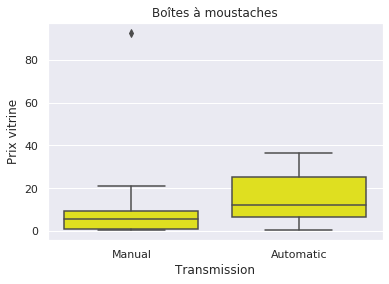

In [101]:
sns.set()

ax = sns.boxplot(x="Transmission", y="Present_Price", data=dataset_anova, color='yellow')
plt.xlabel('Transmission')
plt.ylabel('Prix vitrine')
plt.title('Boîtes à moustaches')
plt.show()

Les boites à moustache semblent indiquer que le mode de transmission influe sur le prix vitrine. On remarque que le 3ème quartile de la boite à moustache sur la transmission manuelle correspond au premier quartile de la boite à moustache sur la transmission automatique.

> On a donc 75% des voitures manuelles avec un prix inférieur à 75% des voitures automatiques.

### Réalisation du test de Fisher

On pose les hypothèses :
- `HO` : Le mode de transmission du véhicule n'a pas d'influence sur son prix en vitrine
- `H1` : Le mode de transmission du véhicule a une influence sur son prix 


In [102]:
# ANOVA
anova = smf.ols('Present_Price~Transmission', data=dataset_anova).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:          Present_Price   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     41.39
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           4.93e-10
Time:                        18:03:41   Log-Likelihood:                -1056.3
No. Observations:                 301   AIC:                             2117.
Df Residuals:                     299   BIC:                             2124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 15

Ici, la p_valeur (F-statistic sur le résumé) est de 4.93e-10, soit un résultat inferieur à 5%.

On rejete donc l'hypothese H0 selon laquelle le mode de transmission n'aurai pas d'influence sur le prix vitrine.

Tableau d'analyse de la variance :

In [103]:
sm.stats.anova_lm(anova, typ=2)

,sum_sq,df,F,PR(>F)
Transmission,2725.856145,1.0,41.39238,4.934747e-10
Residual,19690.363180,299.0,NaN,NaN


## Exercice 2 : Régression linéaire multiple



In [104]:
dataset_reg = pa.read_csv('https://www.labri.fr/perso/zemmari/datasets/car_data.csv',header=0)

for column in dataset_reg.columns:
    if dataset_reg[column].dtype == type(str):
        le = preprocessing.LabelEncoder()
        dataset_reg[column] = le.fit_transform(dataset_reg[column])

dataset_reg.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


On cherche ici à réaliser une régression linéaire multiple. Pour cela on utilise uniquement les variables de type numérique : 
> Year, Selling_Price, Kms_Driven, Owner

In [0]:
Y = dataset_reg['Present_Price']
X = dataset_reg[['Year', 'Selling_Price', 'Kms_Driven', 'Fuel_Type',	'Seller_Type',	'Transmission', 'Owner']]

In [106]:
# Détail de notre modèle de régression
m = OLS(Y,X)
results = m.fit()
su = results.summary()
print(su)

                                 OLS Regression Results                                
Dep. Variable:          Present_Price   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              355.1
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                   2.34e-139
Time:                        18:03:41   Log-Likelihood:                         -824.62
No. Observations:                 301   AIC:                                      1663.
Df Residuals:                     294   BIC:                                      1689.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

On conserve les valeurs qui possèdent une p-value inférieur à `0.05` (5%).

On retire donc les colonnes qui ont été converti : Fuel_Type	Seller_Type	Transmission

In [0]:
X = dataset_reg[['Year', 'Selling_Price', 'Kms_Driven', 'Owner']]

# Construction du modèle de régression multiple
model = LinearRegression()
model.fit(X, Y)

# On utilise notre modèle pour prédire le prix vitrine
def predict(x):
    return (model.coef_ * x ) + model.intercept_

## Exercice 3 : Machine Learning

### Import du dataset

In [108]:
dataset = pa.read_csv('https://www.labri.fr/perso/zemmari/datasets/car_data_2.csv',header=0, sep=';')
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Time_Before_Sell
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,3
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2


In [109]:
# On ajoute la colonne Quick_Sell
dataset['Quick_Sell'] = dataset['Time_Before_Sell'] <= 3
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Time_Before_Sell,Quick_Sell
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2,True
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2,True
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,1,True
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,3,True
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2,True


In [110]:
for column in dataset.columns:
    if dataset[column].dtype == type(str):
        le = preprocessing.LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])

dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Time_Before_Sell,Quick_Sell
0,90,2014,3.35,5.59,27000,2,0,1,0,2,True
1,93,2013,4.75,9.54,43000,1,0,1,0,2,True
2,68,2017,7.25,9.85,6900,2,0,1,0,1,True
3,96,2011,2.85,4.15,5200,2,0,1,0,3,True
4,92,2014,4.60,6.87,42450,1,0,1,0,2,True


### Classificateur Bayesien

In [0]:
# Split du jeu de données en test et train
data = dataset[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',	'Seller_Type',	'Transmission', 'Owner']]
target = dataset['Quick_Sell']
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.3, random_state=18)

In [112]:
# Entrainement du modèle Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

On remarque que l'on doit utiliser uniquement des variables de type numériques. De plus nous supprimons des données les variables : 
> Quick_Sell et Time_Before_Sell

In [113]:
# calcul des prédiction par notre modèle
y_pred = gnb.predict(x_test)

scores = metrics.accuracy_score(y_test, y_pred)
print('Accuracy :', '{:2.2%}'.format(scores))

Accuracy : 58.24%


### Arbre de Décision

Contrairement au classifieur bayesien on peut conserver les valeurs non-numérique pour la construction de notre arbre de décision.

In [0]:
# Split du jeu de données en test et train
data = dataset[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type',	'Seller_Type',	'Transmission']]
target = dataset['Quick_Sell']
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.2, random_state=18)

In [118]:
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [119]:
# Calcul de la prédiction
y_pred_decision_tree = decision_tree.predict(x_test)

# comparaison des résultats obtenus (performance)
scores_decision_tree = metrics.accuracy_score(y_test, y_pred_decision_tree)

print('Accuracy Decision Tree:', '{:2.2%}'.format(scores_decision_tree))

Accuracy Decision Tree: 55.74%
